In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('output_dev.csv')
data

,id,source,sentence_1,sentence_2,label,binary-label,target
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0,1.2
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0,4.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0,4.9
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0,3.8
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0,1.6
...,...,...,...,...,...,...,...
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0,2.4
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0,5.0
547,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0,2.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0,5.0


/tmp/ipykernel_685160/2746951091.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0, 5], [0, 5], 'k-', color='blue', linestyle='--')
/tmp/ipykernel_685160/2746951091.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 5], [0, 5], 'k-', color='blue', linestyle='--')


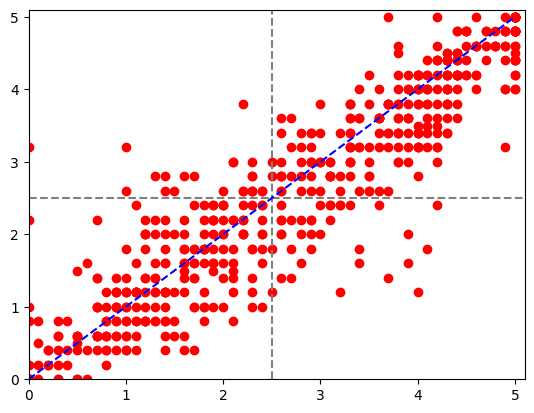

In [9]:
import matplotlib.pyplot as plt

plt.plot(data['target'], data['label'], 'ro')
plt.axis([0, 5.1, 0, 5.1])
# add vertical and horizontal lines on 2.5
plt.axvline(x=2.5, color='grey', linestyle='--')
plt.axhline(y=2.5, color='grey', linestyle='--')
# add linear line, x=y
plt.plot([0, 5], [0, 5], 'k-', color='blue', linestyle='--')
plt.show()

In [4]:
#calculate pearson's correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(data['target'], data['label'])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.919


/tmp/ipykernel_685160/394488139.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0, 5], [0, 5], 'k-', color='blue', linestyle='--')
/tmp/ipykernel_685160/394488139.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 5], [0, 5], 'k-', color='blue', linestyle='--')


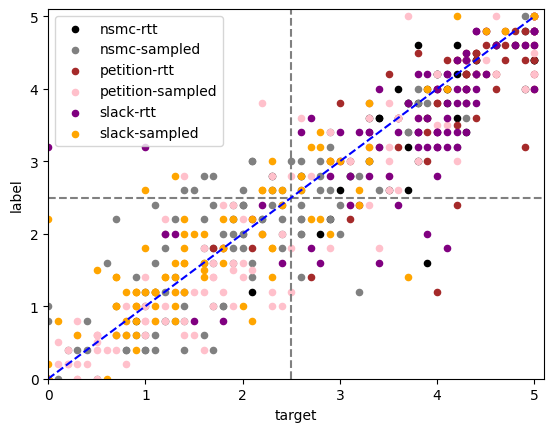

In [13]:
# plot target and label, but group by source. show different colors for each source in one plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'grey', 'black']
for key, group in data.groupby('source'):
    group.plot(ax=ax, kind='scatter', x='target', y='label', label=key, color=colors.pop())
plt.axis([0, 5.1, 0, 5.1])
# add vertical and horizontal lines on 2.5
plt.axvline(x=2.5, color='grey', linestyle='--')
plt.axhline(y=2.5, color='grey', linestyle='--')
# add linear line, x=y
plt.plot([0, 5], [0, 5], 'k-', color='blue', linestyle='--')
plt.show()